# Training a Dummy Dataset

In [1]:
# import pandas as pd
# import numpy as np
# from sklearn.dummy import  DummyClassifier

# train = pd.read_csv('/content/train.iitm.project.csv')
# test = pd.read_csv('/content/test.iitm.project.csv')

# X = train.drop(columns = ['target'])
# y = train['target']

# dummy_class = DummyClassifier()
# dummy_class.fit(X,y)
# y_pred = dummy_class.predict(test)

# sample = pd.read_csv('/content/sample_submission.iitm.project.csv')
# sample['target'] = y_pred
# sample.to_csv('submission.csv')

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

# Data Loading

In [3]:
train = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

# EDA and Visualization

## **Basic EDA**

### Dataset head

In [4]:
train.shape

(39211, 16)

In [5]:
test.shape

(10000, 15)

In [6]:
train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [7]:
test.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


### Dataset Tail

In [8]:
train.tail()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no
39210,2010-03-16,51,student,divorced,tertiary,yes,38594,yes,no,cellular,1877,19,780,148,success,yes


In [9]:
test.tail()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
9995,2010-11-20,38,management,single,tertiary,no,8953,no,yes,cellular,301,1,-1,0,NaN
9996,2009-06-03,26,admin.,single,secondary,no,317,yes,no,NaN,953,1,-1,0,NaN
9997,2010-04-20,26,technician,single,secondary,no,181,no,no,cellular,158,2,-1,0,NaN
9998,2010-02-17,32,management,single,tertiary,no,312,no,no,cellular,232,2,-1,0,NaN
9999,2009-06-03,38,services,married,secondary,no,823,yes,no,NaN,132,5,-1,0,NaN


### Null Values in the Dataset (in %)

In [10]:
train.isna().sum()/len(train)*100

last contact date     0.000000
age                   0.000000
job                   0.584020
marital               0.000000
education             3.741297
default               0.000000
balance               0.000000
housing               0.000000
loan                  0.000000
contact              26.359950
duration              0.000000
campaign              0.000000
pdays                 0.000000
previous              0.000000
poutcome             75.109026
target                0.000000
dtype: float64

#### Insights
- job and education : With only 0.58% and 3.74% of the missing values, simple imputation (e.g., using the mode) is appropriate.

- contact: 26.36% missing data suggests more careful imputation or consideration of dropping this feature based on its importance to the model.

- `poutcome`: 75.11% missing data indicates it might be better to drop this feature, as imputing such a large proportion could introduce bias.













In [11]:
test.isna().sum()/len(test)*100

last contact date     0.00
age                   0.00
job                   0.59
marital               0.00
education             3.90
default               0.00
balance               0.00
housing               0.00
loan                  0.00
contact              26.84
duration              0.00
campaign              0.00
pdays                 0.00
previous              0.00
poutcome             75.08
dtype: float64

- Almost the same number of null values as it is in the training dataset

### Describing the training dataset

In [12]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


#### Insights
- Average age is 42, with a broad range from 18 to 95 years.
- Balance shows high variability, with a mean of 5441, minimum -8019, and maximum 102,127.
- Call duration averages 439 seconds, but there are zero-duration outliers.
- Most people were contacted 2 times (median), with a maximum of 63 contacts.
- Many customers were not previously contacted (pdays = -1 for 75%).
- Most customers had no prior contacts (previous = 0 for 75%), but there are outliers with up to 275 previous contacts.
- **From this we can also conclude that except these features, all the
other features are categorical.**


### Number of Unique Values

In [13]:
raw_categorical_cols = []
for i in train.columns:
  print(f'{i}: {train[i].nunique()}')
  if int(train[i].nunique()) <= 15:
    raw_categorical_cols.append(i)

last contact date: 1013
age: 78
job: 11
marital: 3
education: 3
default: 2
balance: 9535
housing: 2
loan: 2
contact: 2
duration: 3146
campaign: 63
pdays: 865
previous: 276
poutcome: 3
target: 2


#### Insights
- Last contact date, Balance, Duration, Pdays and Previous are the features which indicate high variablity.

### Info

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

- Numerical features: age, balance, duration, campaign, pdays, previous
- Categorical features: last contact date, job, marital, education, default, housing, loan, contact, poutcome, target

### Value counts of categorical variables

In [15]:
#Rough estimate of categorical columns
raw_categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'target']

In [16]:
train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [17]:
for i in raw_categorical_cols:
  print(train[i].value_counts()/len(train[i]) * 100)
  print()

job
blue-collar      19.831170
management       19.030374
technician       15.500752
admin.           10.497054
services          8.479763
self-employed     4.748667
retired           4.651756
entrepreneur      4.603300
unemployed        4.297264
housemaid         4.223305
student           3.552575
Name: count, dtype: float64

marital
married     57.868965
single      28.690929
divorced    13.440106
Name: count, dtype: float64

education
secondary    49.945168
tertiary     29.621790
primary      16.691745
Name: count, dtype: float64

default
no     94.243962
yes     5.756038
Name: count, dtype: float64

housing
yes    55.23195
no     44.76805
Name: count, dtype: float64

loan
no     81.150698
yes    18.849302
Name: count, dtype: float64

contact
cellular     63.834128
telephone     9.805922
Name: count, dtype: float64

poutcome
failure    12.621458
other       6.528780
success     5.740736
Name: count, dtype: float64

target
no     85.139374
yes    14.860626
Name: count, dtype: float6

## **EDA**

### **Univariate Analysis**
Def: Analysis of single column and also patters with the target column

In [18]:
train.columns

Index(['last contact date', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'target'],
      dtype='object')

#### 1. Last Contact Date

In [19]:
train['last contact date'].head()

0    2009-04-17
1    2009-10-11
2    2010-11-20
3    2009-09-01
4    2008-01-29
Name: last contact date, dtype: object

In [20]:
train['last contact date'] = pd.to_datetime(train['last contact date'])
train['year'] = train['last contact date'].dt.year
train['month'] = train['last contact date'].dt.month
train['weekday'] = train['last contact date'].dt.weekday

test['last contact date'] = pd.to_datetime(test['last contact date'])
test['year'] = test['last contact date'].dt.year
test['month'] = test['last contact date'].dt.month
test['weekday'] = test['last contact date'].dt.weekday

train.drop(columns = ['last contact date'], inplace = True)
test.drop(columns = ['last contact date'], inplace = True)


In [21]:
train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,year,month,weekday
0,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no,2009,4,4
1,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no,2009,10,6
2,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no,2010,11,5
3,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no,2009,9,1
4,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no,2008,7,3
39207,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no,2009,7,4
39208,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no,2008,6,0
39209,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no,2010,3,5


In [22]:
test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,year,month,weekday
0,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN,2009,11,5
1,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN,2010,2,3
2,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN,2010,7,2
3,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN,2010,6,2
4,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure,2008,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38,management,single,tertiary,no,8953,no,yes,cellular,301,1,-1,0,NaN,2010,11,5
9996,26,admin.,single,secondary,no,317,yes,no,NaN,953,1,-1,0,NaN,2009,6,2
9997,26,technician,single,secondary,no,181,no,no,cellular,158,2,-1,0,NaN,2010,4,1
9998,32,management,single,tertiary,no,312,no,no,cellular,232,2,-1,0,NaN,2010,2,2


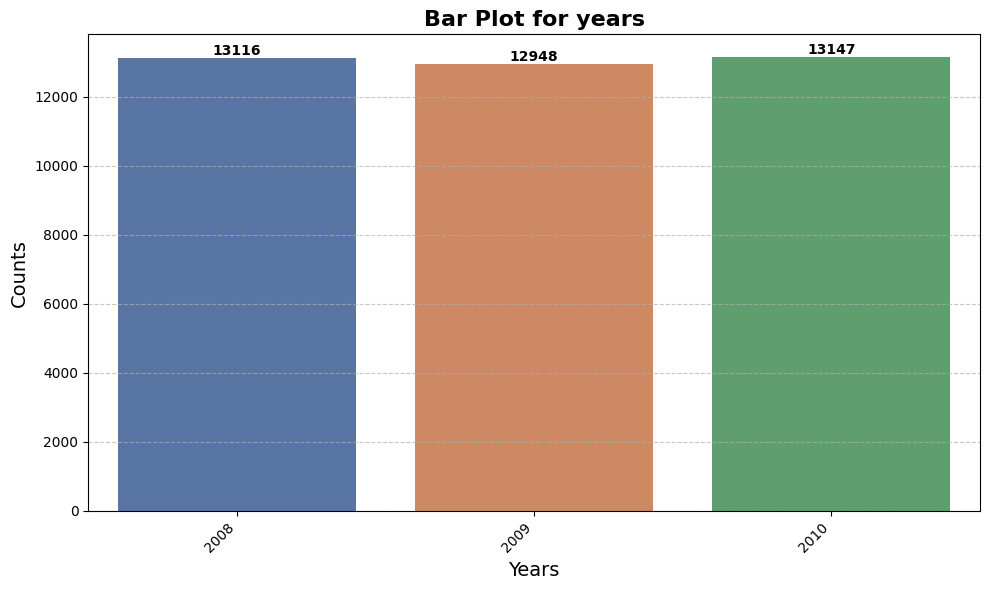

In [23]:
year_value_counts = train['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))

sns.barplot(x=year_value_counts.index, y=year_value_counts.values, palette='deep')

plt.title('Bar Plot for years', fontsize=16, weight='bold', color='black')
plt.xlabel('Years', fontsize=14, color='black')
plt.ylabel('Counts', fontsize=14, color='black')

# For value annotations on the bars
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


##### Insights
- The Bar Plot clearly shows that the feature 'last contact date' is evenly spread in the years 2008, 2009 and 2010.
- **We can also think to further drop this feature as no such disparity is there between the features**

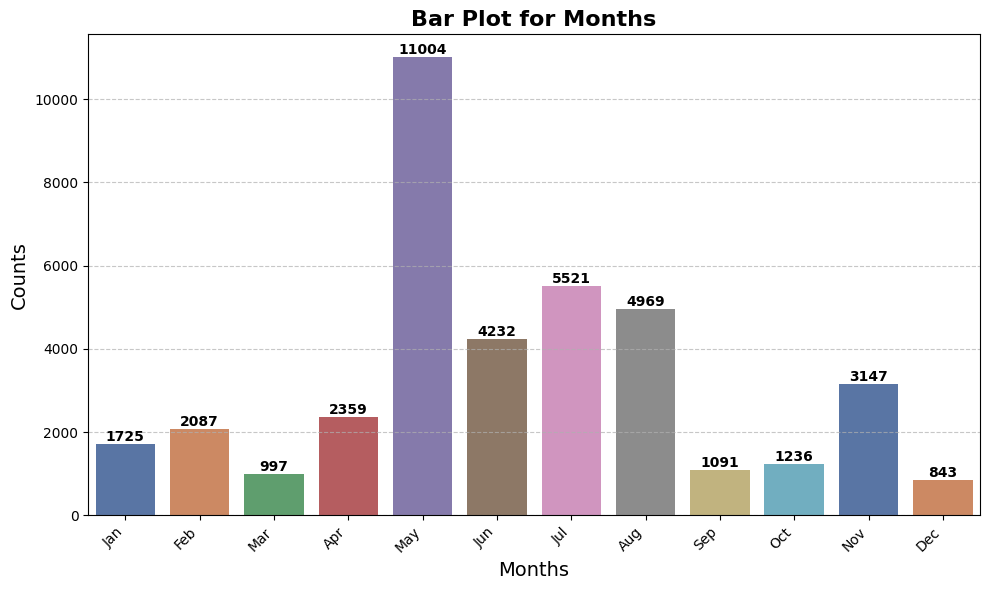

In [24]:
month_value_counts = train['month'].value_counts().sort_index()
month_value_counts = train['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))

sns.barplot(x=month_value_counts.index, y=month_value_counts.values, palette='deep')

plt.title('Bar Plot for Months', fontsize=16, weight='bold', color='black')
plt.xlabel('Months', fontsize=14, color='black')
plt.ylabel('Counts', fontsize=14, color='black')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', weight='bold')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(len(month_names)), labels=month_names, rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



##### Insights
- It is clearly evident from the bar plot that `May` is the month in which the last contact date occurs the most frequently.

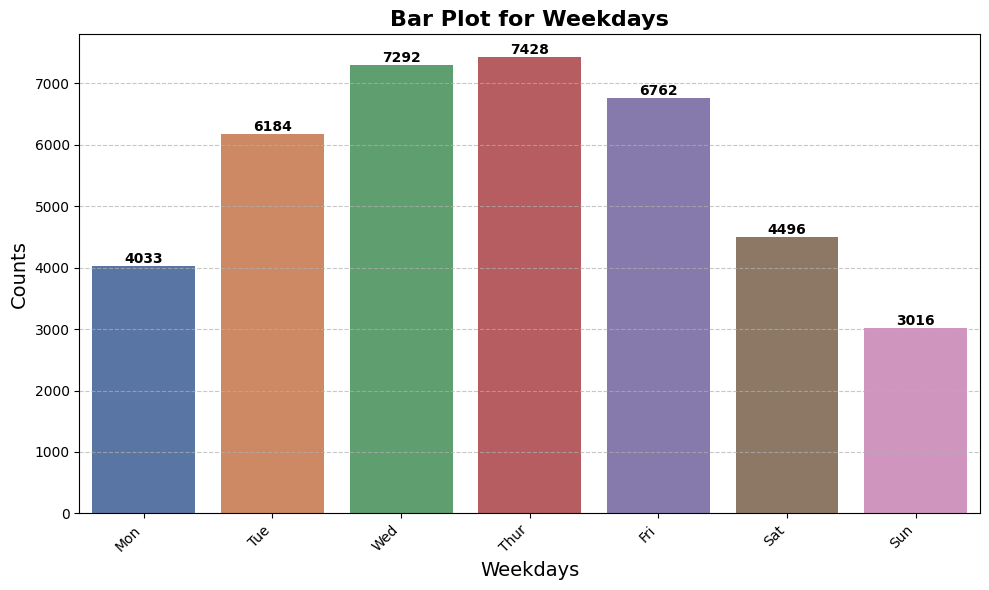

In [25]:
weekday_value_counts = train['weekday'].value_counts().sort_index()
weekday_value_counts = train['weekday'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

sns.barplot(x=weekday_value_counts.index, y=weekday_value_counts.values, palette='deep')

plt.title('Bar Plot for Weekdays', fontsize=16, weight='bold', color='black')
plt.xlabel('Weekdays', fontsize=14, color='black')
plt.ylabel('Counts', fontsize=14, color='black')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', weight='bold')

wd_names = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
plt.xticks(ticks=range(len(wd_names)), labels=wd_names, rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

##### Insights 
- Highest Contact Days: Thursday has the highest number of contacts, with a count of 7428, closely followed by Wednesday with 7292. This suggests that the middle of the week (Wednesday and Thursday) sees the most customer engagement.

- Moderate Contact Days: Friday (6762 contacts) and Tuesday (6184 contacts) have moderate levels of customer contacts. These days are also popular for contacting customers but not as high as Wednesday and Thursday.

- Lowest Contact Days: Sunday has the lowest count at 3016, followed by Monday with 4033 contacts. This indicates that weekends, especially Sunday, have the least customer interaction.

- `Weekend vs. Weekday Trend`: There is a clear decline in contact frequency on weekends (Saturday and Sunday), suggesting that customers or agents may be less active or available on these days.

#### 2. Age
Age is a numeric column

In [26]:
train['age'].head()

0    26
1    52
2    44
3    33
4    31
Name: age, dtype: int64

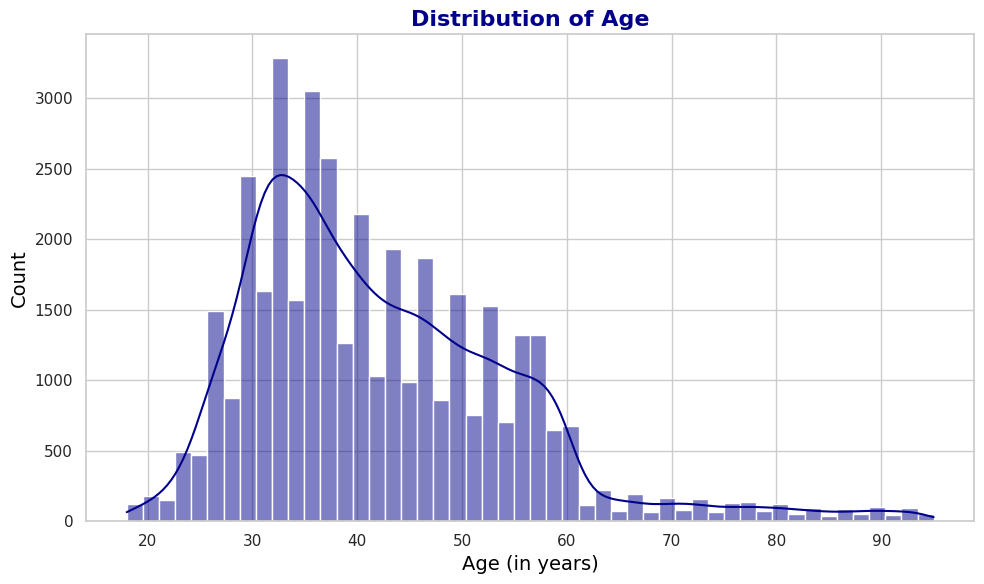

In [27]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,6))
sns.set(style="whitegrid") 

sns.histplot(train['age'], bins=50, color='darkblue', kde=True, edgecolor='white')

plt.title('Distribution of Age', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Age (in years)', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')

plt.grid(True)
plt.tight_layout()  
plt.show()


##### Insights of Histogram
- The age distribution is `right-skewed`, indicating more younger individuals and fewer older ones.
- The peak age range is around 30-35 years, where the highest frequency occurs.
- There's a steady decline in the number of individuals after 40 years.
- The dataset includes a few older individuals, with ages up to 90 years.
- The KDE curve confirms that the majority of the data is concentrated around younger ages.

**Checking the value for skewness**

In [28]:
from scipy.stats import skew
print(skew(train['age']))

1.1242348167399974


- A skewness value of 1.124 suggests a moderately right-skewed distribution, with a majority of data points on the lower side and some higher values that extend the tail.

Checking for **Outliers** using Box-Plot

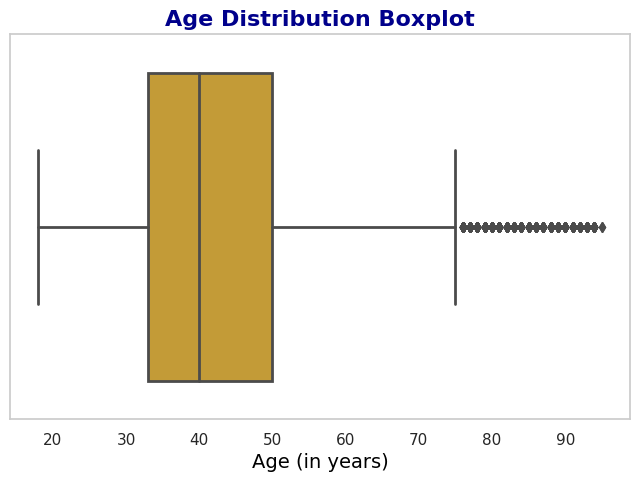

In [29]:
plt.figure(figsize=(8,5))

sns.boxplot(x=train['age'], color='goldenrod', linewidth=2)

plt.title('Age Distribution Boxplot', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Age (in years)', fontsize=14, color='black')

plt.grid(False)

plt.show()


##### Insights of Box-Plot
- The median age is around 40 years, indicated by the middle line in the box.
- The interquartile range (IQR) spans from about 30 to 50 years, showing the middle 50% of the data.
- There are outliers beyond 75 years, representing older individuals in the dataset.

#### 3. Job

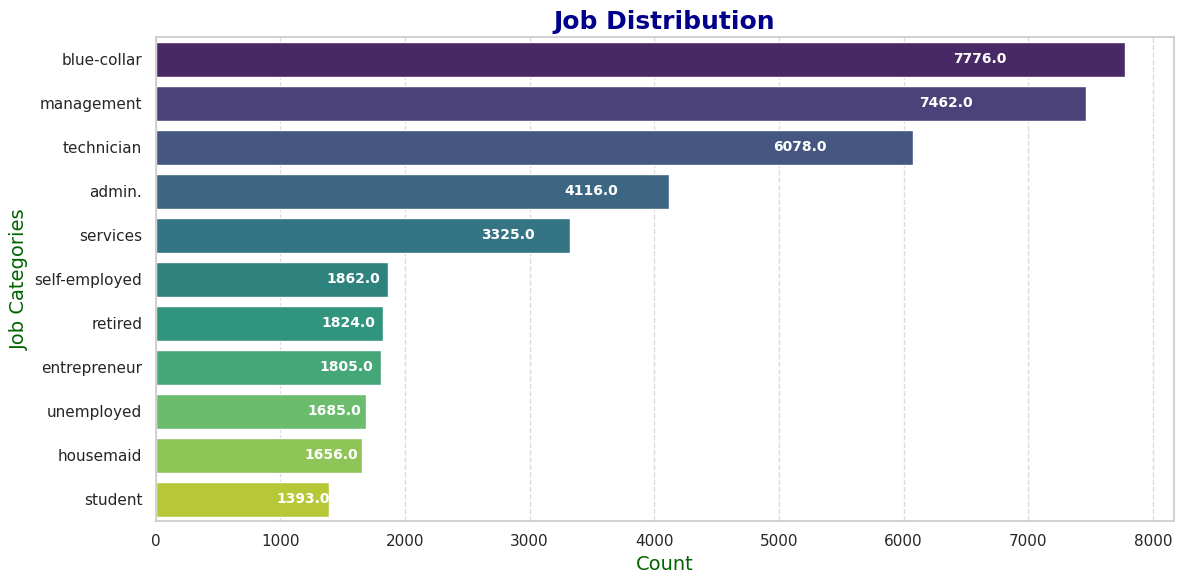

In [30]:
plt.figure(figsize=(12, 6))

sns.countplot(y=train['job'], palette='viridis', order=train['job'].value_counts().index)

plt.title('Job Distribution', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Count', fontsize=14, color='darkgreen')
plt.ylabel('Job Categories', fontsize=14, color='darkgreen')

for p in plt.gca().patches:
    plt.annotate(f'{p.get_width()}', (p.get_width() - 0.15 * p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='center', va='center', fontsize=10, color='white', weight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()



##### Insights of Bar-Plot
- Blue-collar and management jobs have the highest count with 7776 and 7462 individuals respectively.
- Technicians rank third, comprising 6078 individuals.
- The administrative category includes 4116 individuals.
- The services sector has 3325 individuals represented.
- Self-employed individuals total 1862, showing moderate representation.
- The retired category contains 1824 individuals.
- Entrepreneurs make up 1805 individuals within the dataset.
- Unemployed individuals are represented by 1685 counts.
- The housemaid category includes 1656 individuals.
- Students constitute a smaller proportion with 1393 individuals.
- All in all, The distribution emphasizes the `dominance of blue-collar and management roles`.

#### 4. Marital

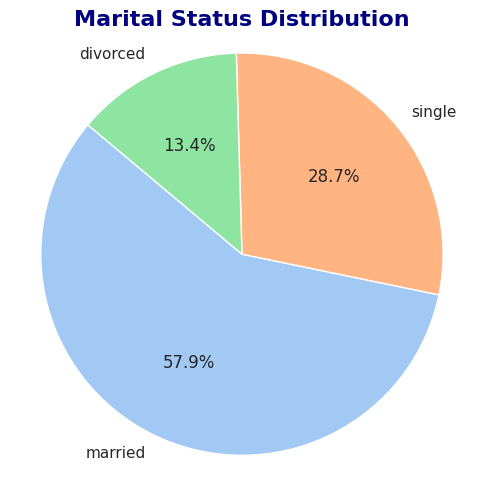

In [31]:
plt.figure(figsize=(5, 5))

marital_counts = train['marital'].value_counts()
plt.pie(marital_counts,
        labels=marital_counts.index,
        autopct='%1.1f%%', 
        startangle=140,
        colors=sns.color_palette('pastel', len(marital_counts)))

plt.title('Marital Status Distribution', fontsize=16, weight='bold', color='navy')

plt.axis('equal')  
plt.tight_layout()
plt.show()



##### Insights of pie chart
- `Majority Married`: 57.9% of the individuals in the dataset are married, indicating a predominant marital status.
- `Significant Single Population`: 28.7% of the individuals are single, suggesting a notable portion of the population is unmarried.
- `Divorce Rates`: 13.4% of the population is divorced, reflecting a smaller but significant group.
- `Married vs. Unmarried`: The combined percentage of unmarried individuals (single + divorced) is 42.1%, highlighting a substantial proportion of non-married individuals.


#### 5. Education

In [32]:
sub_value_counts = train['education'].value_counts().sort_index()
sub_value_counts

education
primary       6545
secondary    19584
tertiary     11615
Name: count, dtype: int64

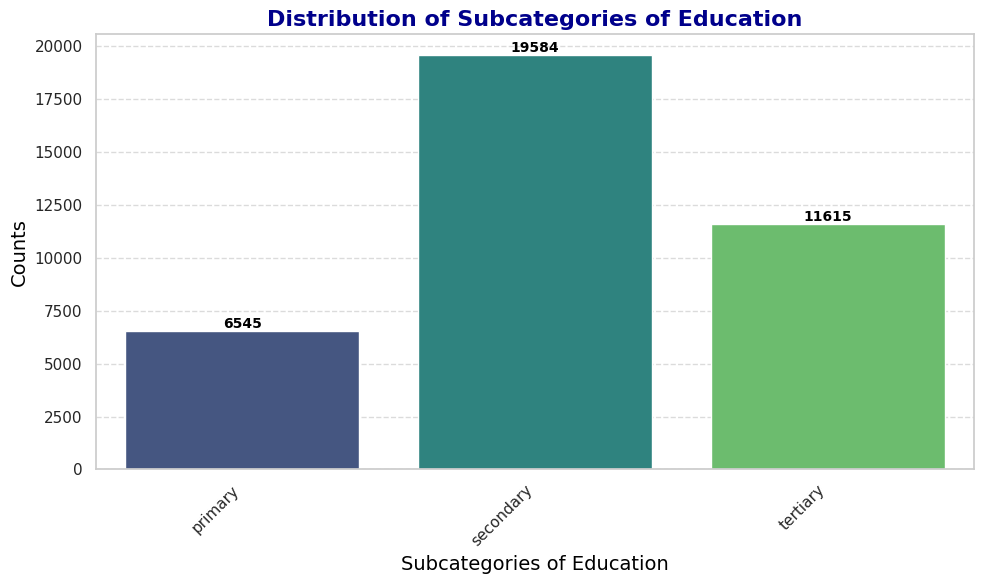

In [33]:
plt.figure(figsize=(10, 6))

sns.barplot(x=sub_value_counts.index, y=sub_value_counts.values, palette='viridis')

plt.title('Distribution of Subcategories of Education', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Subcategories of Education', fontsize=14, color='black')
plt.ylabel('Counts', fontsize=14, color='black')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


##### Insights of Bar-Plot
- `Highest Representation`: The majority of individuals in the dataset fall under the "secondary" education category, with a count of 19,584. This suggests that people with a secondary education level are the primary target or most prevalent in this telemarketing campaign.

- `Moderate Representation`: The "tertiary" education category has the second-highest count, with 11,615 individuals. This indicates that a substantial portion of the audience also has higher education levels, but it is significantly lower than the "secondary" category.

- `Lowest Representation`: The "primary" education category has the lowest count, with only 6,545 individuals. This shows that people with primary education are the least represented group in the dataset.

- **Potential for Targeted Campaigns**: If there are significant differences in conversion success rates based on education level, the marketing campaign can be adjusted to focus more on the group with the highest conversion likelihood.

In [34]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'target', 'year', 'month', 'weekday'],
      dtype='object')

In [35]:
train.head() 

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,year,month,weekday
0,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no,2009,4,4
1,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no,2009,10,6
2,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no,2010,11,5
3,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no,2009,9,1
4,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no,2008,1,1


#### 6. Default 

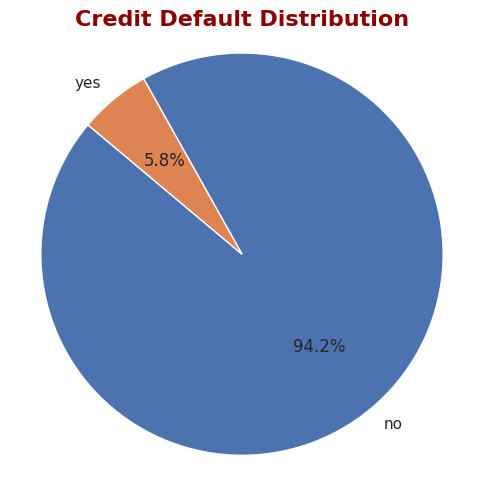

In [36]:
plt.figure(figsize=(5, 5))
default_counts = train['default'].value_counts()

plt.pie(default_counts,
        labels=default_counts.index,
        autopct='%1.1f%%',  # For writing in %
        startangle=140,
        colors=sns.color_palette('deep', len(default_counts)))  

plt.title('Credit Default Distribution', fontsize=16, weight='bold', color='darkred')

plt.axis('equal') 
plt.tight_layout()
plt.show()


##### Insights of Pie-Chart 
- `Low Default Incidence`: With 94.2% of clients having no credit default history, the bank’s audience appears financially stable.
- `Higher Subscription Potential`: Clients with no default history may have a greater likelihood of subscribing to new products.
- `Focused Risk Management`: Only 5.8% of clients are high-risk, indicating low priority for default risk in this campaign.
- `Campaign Strategy`: The bank can focus on wealth-building messaging to appeal to a low-risk, financially stable audience.

#### 7. Balance

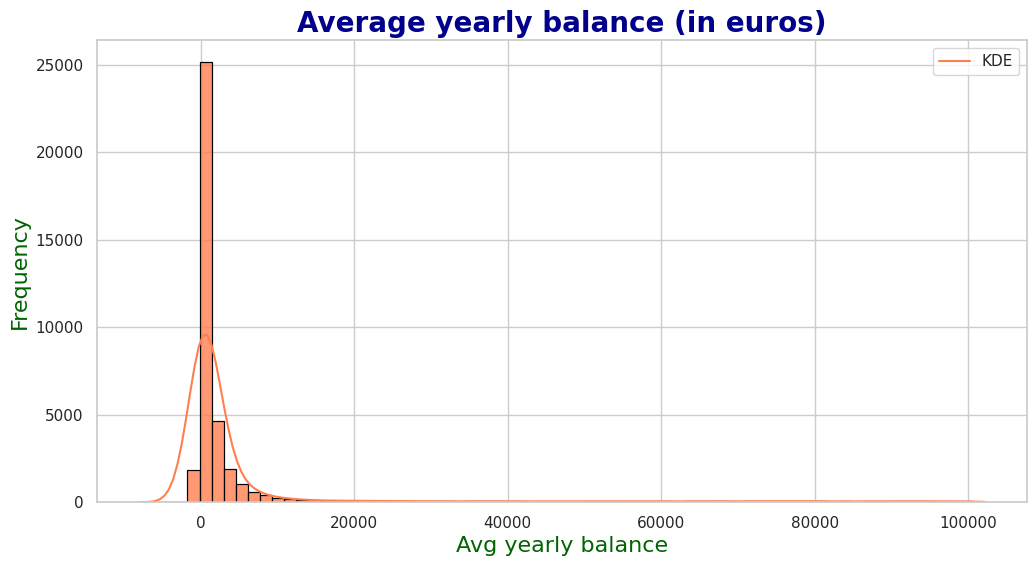

In [37]:
plt.figure(figsize=(12, 6))

sns.histplot(x=train['balance'], bins=70, kde=True, color='coral', edgecolor='black', alpha=0.8)

plt.title('Average yearly balance (in euros)', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Avg yearly balance', fontsize=16, color='darkgreen')
plt.ylabel('Frequency', fontsize=16, color='darkgreen')

plt.legend(['KDE'])

plt.show()


##### Insights of Histogram
- The distribution of average yearly balances is `highly right-skewed`, with most values concentrated near zero.
- A significant majority of customers have low yearly balances, indicating limited account activity or savings.
- There are a few customers with very high balances, creating a long tail in the distribution.
- The KDE plot suggests a sharp peak at the lower end, highlighting a dense cluster of low-balance accounts.
- The presence of extreme values `may indicate outliers` that could affect statistical analyses if not addressed.

Now, Let us check for **outliers**

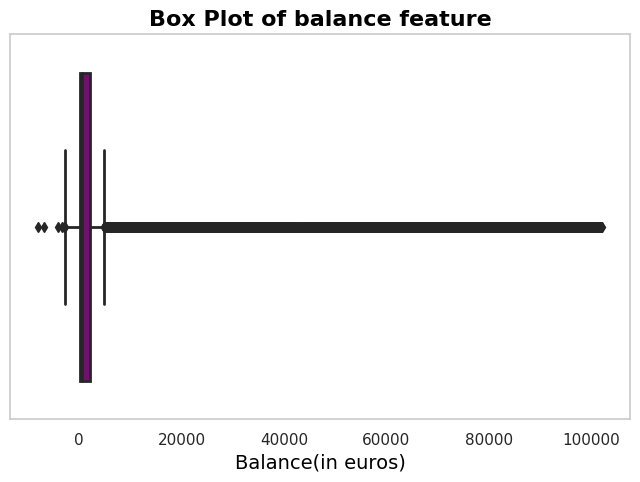

In [38]:
plt.figure(figsize=(8,5))

sns.boxplot(x=train['balance'], color='purple', linewidth=2)

plt.title('Box Plot of balance feature', fontsize=16, weight='bold', color='black')
plt.xlabel('Balance(in euros)', fontsize=14, color='black')

plt.grid(False)

plt.show()


##### Insights of Box-Plot
- The majority of balances are clustered close to zero, with very little variation around the median.
- There is a significant number of outliers, extending far beyond the upper whisker, indicating high variability in balances.
- The median balance is very close to the lower end, reflecting that most customers have low account balances.
- The presence of extreme outliers suggests a few customers with exceptionally high balances, which could skew the overall analysis.
- The narrow interquartile range (IQR) indicates limited dispersion for most balance values, despite the wide range of outliers.







#### 8. Housing


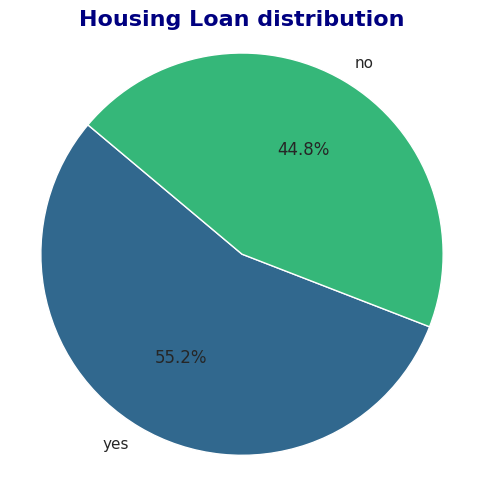

In [39]:
plt.figure(figsize=(5, 5))

housing_counts = train['housing'].value_counts()
plt.pie(housing_counts,
        labels=housing_counts.index,
        autopct='%1.1f%%', 
        startangle=140,
        colors=sns.color_palette('viridis', len(housing_counts)))

plt.title('Housing Loan distribution', fontsize=16, weight='bold', color='navy')

plt.axis('equal')  
plt.tight_layout()
plt.show()


##### Insights of Pie-Chart
- The nearly balanced distribution suggests diverse financial situations regarding housing loans in the dataset.
- The data may imply a potential market for loan-related financial services `targeting both existing and non-loan holders.`

#### 9. Loan(Personal)

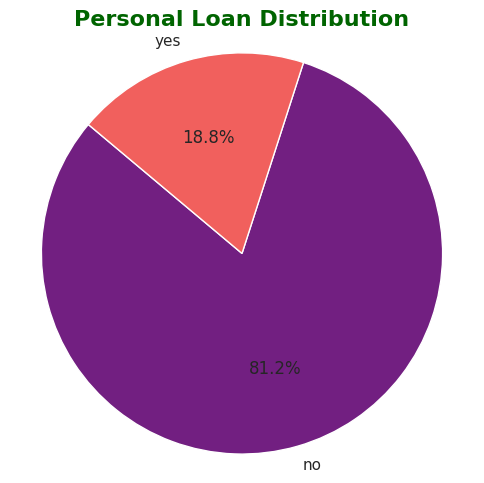

In [40]:
plt.figure(figsize=(5, 5))

loan_counts = train['loan'].value_counts()
plt.pie(loan_counts,
        labels=loan_counts.index,
        autopct='%1.1f%%', 
        startangle=140,
        colors=sns.color_palette('magma', len(loan_counts)))  

plt.title('Personal Loan Distribution', fontsize=16, weight='bold', color='darkgreen')

plt.axis('equal')
plt.tight_layout()
plt.show()


##### Insights 
- `Low Loan Incidence`: The majority of clients (81.2%) do not have personal loans, indicating relatively low credit dependency among the bank's audience.

- `Higher Potential for Product Subscription`: Clients without existing loans may have a greater capacity to subscribe to new financial products like term deposits.

- `Risk Management Opportunity`: This low loan ratio implies that financial risk is relatively low for this client base, possibly easing risk considerations in targeting.

- `Campaign Focus`: The bank could prioritize term deposit campaigns for this group, as they may be more receptive to new investment opportunities.


#### 10. Contact

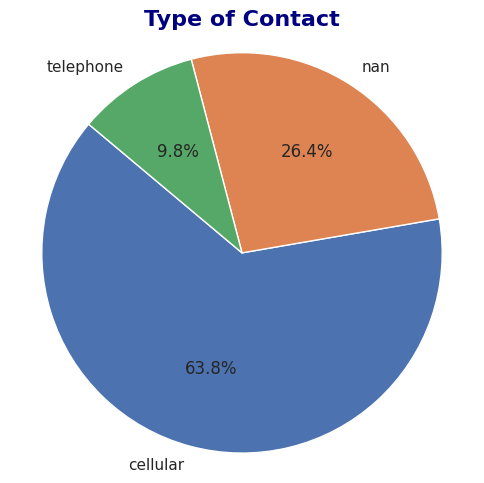

In [41]:
plt.figure(figsize=(5, 5))

con_counts = train['contact'].value_counts(dropna = False)
plt.pie(con_counts,
        labels=con_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('deep', len(con_counts)))

plt.title('Type of Contact', fontsize=16, weight='bold', color='navy')

plt.axis('equal')  
plt.tight_layout()
plt.show()


##### Insights of Pie-Chart
- `Cellular Contact Dominates`: 63.8% of the contacts are made to individuals those who have cellular phones, making it the most common method.
- `Significant Null Values (nan)`: 26.4% of the data is missing or contains null values (nan), which should be addressed.
- `Telephone Contact`: Only 9.8% of the contacts are made to telephone.

#### 11. poutcome

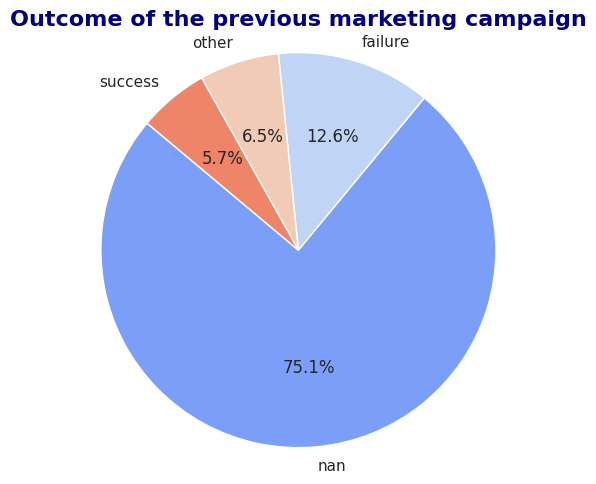

In [42]:
plt.figure(figsize=(5, 5))

con_counts = train['poutcome'].value_counts(dropna = False)
plt.pie(con_counts,
        labels=con_counts.index,
        autopct='%1.1f%%', 
        startangle=140,
        colors=sns.color_palette('coolwarm', len(con_counts)))

plt.title('Outcome of the previous marketing campaign', fontsize=16, weight='bold', color='navy')

plt.axis('equal')  
plt.tight_layout()
plt.show()


##### Insights of pie-chart
- `High Percentage of Missing Data` (nan): 75.1% of the data is missing or null, which is a significant portion and needs to be addressed. There are high chances that we may drop this feature as it has majority as null values.
- `Campaign Failures`: 12.6% of the previous marketing campaigns resulted in failure.
- `Campaign Success`: Only 5.7% of the campaigns were successful.

In [43]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'target', 'year', 'month', 'weekday'],
      dtype='object')

#### Target Column


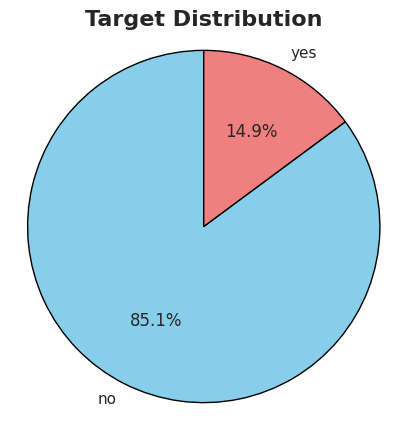

In [44]:
values = list(train['target'].value_counts().keys())
proportion = list(train['target'].value_counts().values)

colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(5,5))

plt.pie(x=proportion, labels=values, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor':'black'})

plt.title('Target Distribution', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()

##### Insights of Pie-Chart
- There is a **clear imbalance** between the two categories, with "no" dominating the distribution.
- The "yes" category forms less than one-fifth of the total distribution.
- The target is `skewed heavily towards the "no" outcome`.

In [45]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'target', 'year', 'month', 'weekday'],
      dtype='object')

### **Multivariate Analysis**

#### Relationship between numerical features

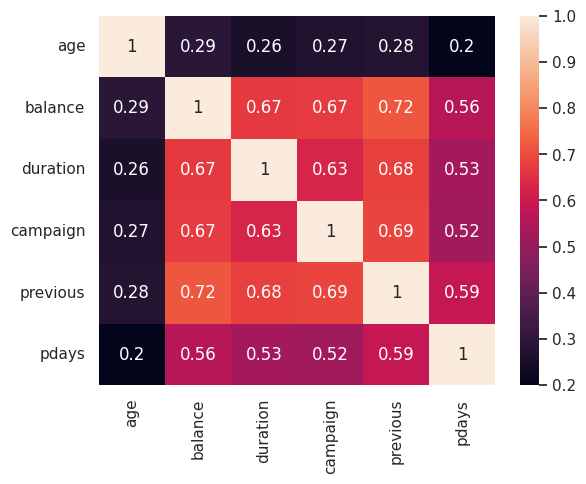

In [46]:
corr = train[['age','balance','duration','campaign','previous','pdays']].corr()
sns.heatmap(corr, annot=True)
plt.show() 

##### Insights
- Balance-Previous: High correlation (0.72) suggests clients with more contacts before this campaign tend to have higher balances.

- Balance-Duration: Strong correlation (0.67) implies clients with higher balances often have longer call durations.

- Duration-Previous: Correlation of 0.68 indicates longer calls are common with clients contacted in previous campaigns.

- Campaign-Other Features: Moderate correlations suggest that more contacts during a campaign relate to higher balances, call durations, and prior contacts.

- Age: Weak correlations across other features indicate age has little direct impact on campaign-related metrics.

- Pdays-Previous: Moderate correlation (0.59) implies clients with recent prior contacts likely had multiple previous contacts.

#### Effect of age on Personal Loan

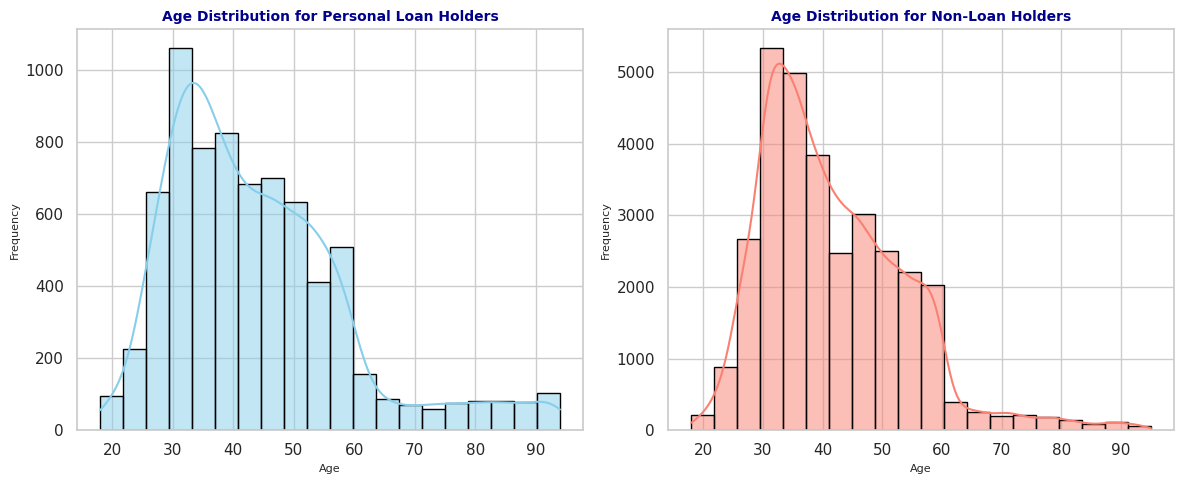

In [47]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 5))

# Plot 1: Age distribution for people with a personal loan
plt.subplot(1, 2, 1)
sns.histplot(data=train[train['loan'] == 'yes'], x='age', bins=20, color='skyblue', kde=True, edgecolor='black')
plt.title('Age Distribution for Personal Loan Holders', fontsize=10, weight='bold', color='darkblue')
plt.xlabel('Age', fontsize=8)
plt.ylabel('Frequency', fontsize=8)

# Plot 2: Age distribution for people without a personal loan
plt.subplot(1, 2, 2)
sns.histplot(data=train[train['loan'] == 'no'], x='age', bins=20, color='salmon', kde=True, edgecolor='black')
plt.title('Age Distribution for Non-Loan Holders', fontsize=10, weight='bold', color='darkblue')
plt.xlabel('Age', fontsize=8)
plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()



##### Insights
- Both distributions show a concentration of individuals in the 30–40 age range.
- Personal loan holders have a relatively uniform distribution from ages 30 to 50.
- Loan holders appear to have a wider age distribution extending into older ages than non-loan holders.
- Non-loan holders have a sharper peak around age 30 compared to loan holders.

#### Effect of Age on Housing Loan

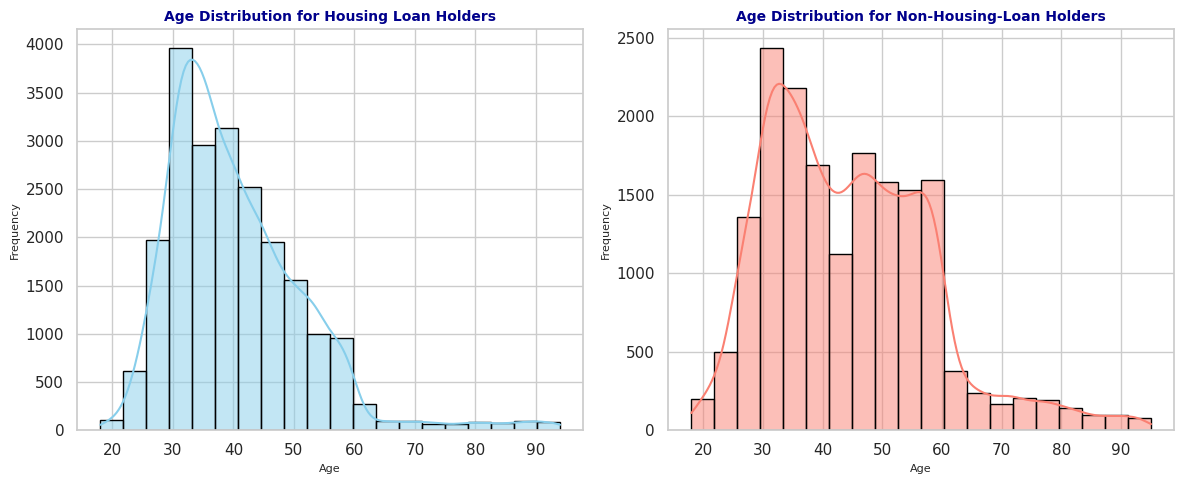

In [48]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 5))

# Plot 1: Age distribution for people with a housing loan
plt.subplot(1, 2, 1)
sns.histplot(data=train[train['housing'] == 'yes'], x='age', bins=20, color='skyblue', kde=True, edgecolor='black')
plt.title('Age Distribution for Housing Loan Holders', fontsize=10, weight='bold', color='darkblue')
plt.xlabel('Age', fontsize=8)
plt.ylabel('Frequency', fontsize=8)

# Plot 2: Age distribution for people without a housing loan
plt.subplot(1, 2, 2)
sns.histplot(data=train[train['housing'] == 'no'], x='age', bins=20, color='salmon', kde=True, edgecolor='black')
plt.title('Age Distribution for Non-Housing-Loan Holders', fontsize=10, weight='bold', color='darkblue')
plt.xlabel('Age', fontsize=8)
plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()


##### Insights
- Both groups have a concentration of individuals in the 30–40 age range.
- Housing loan holders have a more gradual decline in frequency after age 40 compared to non-housing loan holders.
- The peak for housing loan holders is slightly higher, around age 30–35.
- The distribution for non-housing loan holders shows more variability, with noticeable dips and peaks between ages 40 and 60.

#### Effect of Education on Personal loan

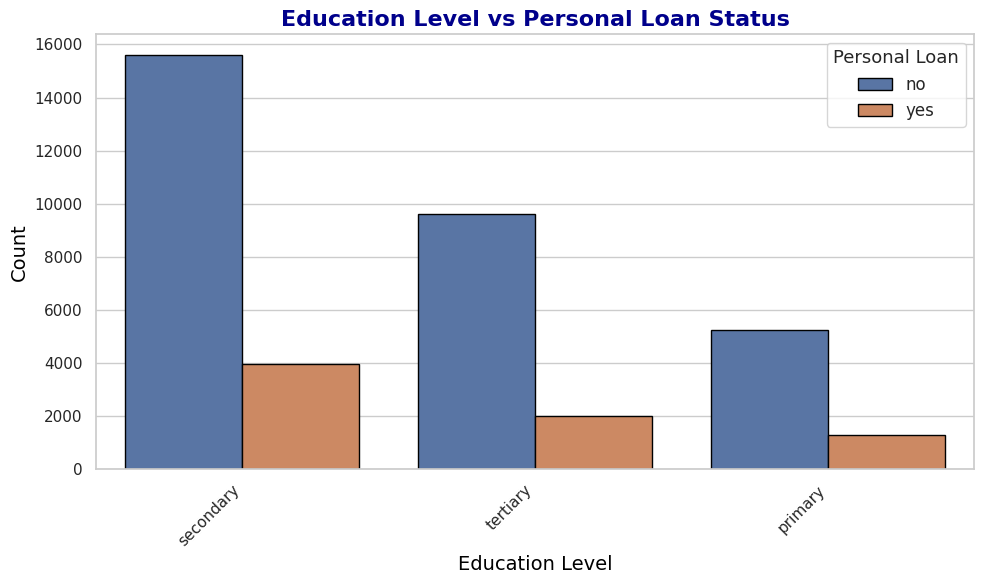

In [49]:
plt.figure(figsize=(10, 6))

sns.countplot(data=train, x='education', hue='loan', palette='deep', edgecolor='black')

plt.title('Education Level vs Personal Loan Status', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Education Level', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')
plt.legend(title='Personal Loan', loc='upper right', fontsize=12, title_fontsize='13')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


##### Insights
- Individuals with secondary education dominate the dataset, and across all education levels, the majority do not have personal loans

#### Relationship b/w Age category and Personal Loan

In [50]:
age_cat = []
for i in train['age']:
  if int(i)<30:
    age_cat.append('young')
  elif i<=50:
    age_cat.append('middle')
  else:
    age_cat.append('old')


In [51]:
train['age_cat'] = age_cat

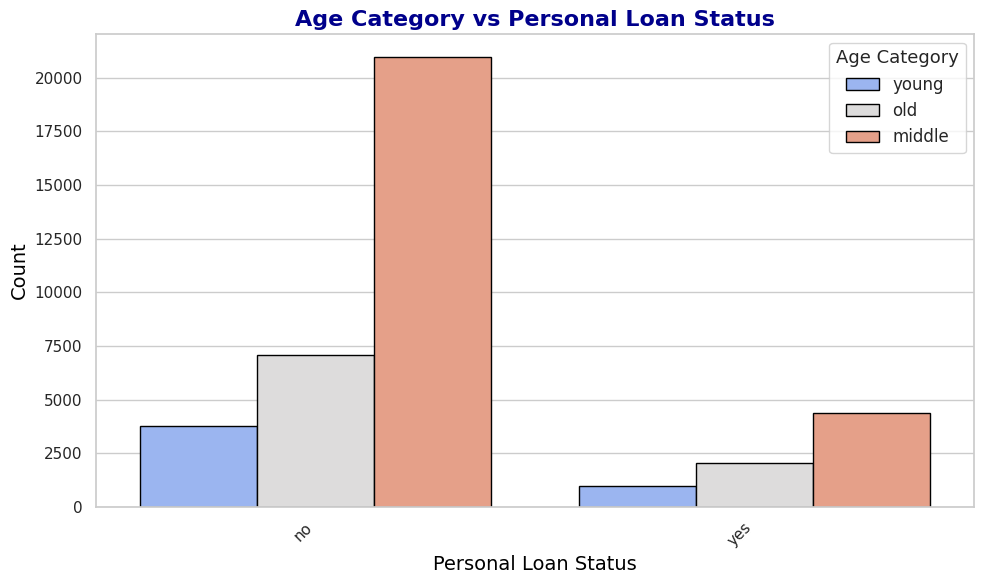

In [52]:
plt.figure(figsize=(10, 6))

# Creating a count plot for the relationship between Age Category and personal loan status
sns.countplot(data=train, x='loan', hue='age_cat', palette='coolwarm', edgecolor='black')

plt.title('Age Category vs Personal Loan Status', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Personal Loan Status', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')

plt.legend(title='Age Category', loc='upper right', fontsize=12, title_fontsize='13')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


##### Insights
- Middle-aged individuals form the largest group in both categories (with and without loans), though they are much more represented in the "no loan" group.
- Young people are least likely to have personal loans.







#### Relationship between Age Category and Target Variable

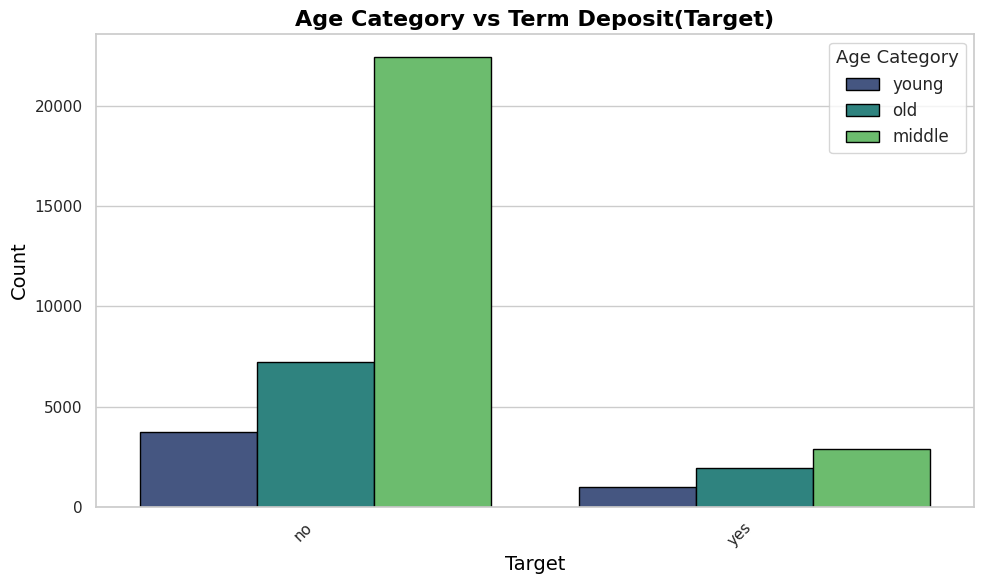

In [53]:
plt.figure(figsize=(10, 6))

# Creating a count plot for the relationship between Target variable and personal loan status
sns.countplot(data=train, x='target', hue='age_cat', palette='viridis', edgecolor='black')

plt.title('Age Category vs Term Deposit(Target)', fontsize=16, weight='bold', color='black')
plt.xlabel('Target', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')

plt.legend(title='Age Category', loc='upper right', fontsize=12, title_fontsize='13')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### Insights
- Middle-aged individuals are the largest group in both categories (with and without term deposits), but they are particularly prevalent among those who do not have term deposits.
- Both young and older individuals show limited representation in term deposit ownership, though the older group shows slightly more participation.

# Preprocessing

## Strategy 1: Using Simple Imputer

In [54]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,year,month,weekday,age_cat
0,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no,2009,4,4,young
1,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no,2009,10,6,old
2,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no,2010,11,5,middle
3,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no,2009,9,1,middle
4,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no,2008,1,1,middle


- Dropping last contact date and age_cat columns as we have already extracted the information from them

In [55]:
# train = train.drop(columns = ['last contact date','age_cat'])
# test = test.drop(columns = ['last contact date'])


In [56]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,year,month,weekday,age_cat
0,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no,2009,4,4,young
1,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no,2009,10,6,old
2,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no,2010,11,5,middle
3,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no,2009,9,1,middle
4,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no,2008,1,1,middle


In [57]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,year,month,weekday
0,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN,2009,11,5
1,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN,2010,2,3
2,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN,2010,7,2
3,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN,2010,6,2
4,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure,2008,3,6


- Splitting features and target variables

In [58]:
X = train.drop(columns = ['target'])
y = train['target']

- Splitting the dataset into training and validation set.

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
#As our target variable is highly imbalanced, setting stratify=y will ensure that
#both the training and the validation sets are in the same proportion of each class
#as in the original dataset.

- As our target variable is highly imbalanced, setting stratify=y will ensure that both the training and the validation sets are in the same proportion of each class as in the original dataset.

In [60]:
y_val.value_counts()


target
no     6677
yes    1166
Name: count, dtype: int64

In [61]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'target', 'year', 'month', 'weekday', 'age_cat'],
      dtype='object')

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        39211 non-null  int64 
 1   job        38982 non-null  object
 2   marital    39211 non-null  object
 3   education  37744 non-null  object
 4   default    39211 non-null  object
 5   balance    39211 non-null  int64 
 6   housing    39211 non-null  object
 7   loan       39211 non-null  object
 8   contact    28875 non-null  object
 9   duration   39211 non-null  int64 
 10  campaign   39211 non-null  int64 
 11  pdays      39211 non-null  int64 
 12  previous   39211 non-null  int64 
 13  poutcome   9760 non-null   object
 14  target     39211 non-null  object
 15  year       39211 non-null  int32 
 16  month      39211 non-null  int32 
 17  weekday    39211 non-null  int32 
 18  age_cat    39211 non-null  object
dtypes: int32(3), int64(6), object(10)
memory usage: 5.2+ MB


- Now, we will make pipelines for data preprocessing

In [63]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, test.shape)

(31368, 18) (31368,) (7843, 18) (7843,) (10000, 17)


In [64]:
# num = X.select_dtypes(include = ['int64','int32']).columns
# cat = X.select_dtypes(include = ['object']).columns 

# num_pipe = Pipeline([
#      ('imputer', SimpleImputer(strategy = 'mean')),
#      ('scaler', StandardScaler())
#  ])

# cat_pipe = Pipeline([
#      ('imputer', SimpleImputer(strategy='constant', fill_value = 'unknown')),
#      ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
#  ])

# num_pipe,cat_pipe

# preprocessor = ColumnTransformer(
#     transformers = [
#         ('numerical', num_pipe, num),
#         ('categorical', cat_pipe, cat)
#     ]
# )
# preprocessor

# X_train_transformed1 = preprocessor.fit_transform(X_train)
# X_val_transformed1 = preprocessor.transform(X_val)
# test = preprocessor.transform(test)

# X_train_transformed1 = pd.DataFrame(X_train_transformed1)
# X_val_transformed1 = pd.DataFrame(X_val_transformed1)
# test_final = pd.DataFrame(test)

## Strategy 2: Using Iterative Imputer and Label Encoder
Basically because of poutcome we have to adopt this strategy because it has a very high correlaton with the target variable.

In [65]:
X_train.drop(columns = ['age_cat','year'], inplace = True)
X_val.drop(columns = ['age_cat','year'], inplace = True)
test.drop(columns = ['year'],inplace = True)

In [66]:
col = X_train.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'month', 'weekday'],
      dtype='object')

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31368 entries, 6963 to 21395
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31368 non-null  int64 
 1   job        31173 non-null  object
 2   marital    31368 non-null  object
 3   education  30177 non-null  object
 4   default    31368 non-null  object
 5   balance    31368 non-null  int64 
 6   housing    31368 non-null  object
 7   loan       31368 non-null  object
 8   contact    23089 non-null  object
 9   duration   31368 non-null  int64 
 10  campaign   31368 non-null  int64 
 11  pdays      31368 non-null  int64 
 12  previous   31368 non-null  int64 
 13  poutcome   7815 non-null   object
 14  month      31368 non-null  int32 
 15  weekday    31368 non-null  int32 
dtypes: int32(2), int64(6), object(8)
memory usage: 3.8+ MB


In [68]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,month,weekday
6963,49,management,divorced,tertiary,no,1253,yes,no,cellular,83,2,-1,0,NaN,5,3
12250,61,housemaid,married,tertiary,no,1389,no,no,cellular,250,1,-1,0,NaN,4,3
25449,56,management,married,tertiary,no,94,no,no,cellular,530,3,-1,0,NaN,7,2
6383,47,services,married,secondary,no,505,no,no,NaN,152,3,-1,0,NaN,6,4
5896,32,technician,single,secondary,no,930,yes,no,NaN,122,1,-1,0,NaN,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,39,technician,single,secondary,no,316,no,no,cellular,100,1,-1,0,NaN,8,4
35938,46,management,divorced,secondary,no,145,yes,no,cellular,113,2,270,5,failure,4,6
6777,44,self-employed,married,secondary,no,1310,yes,no,NaN,290,1,-1,0,NaN,5,4
23988,37,technician,married,secondary,no,588,yes,no,cellular,65,4,-1,0,NaN,8,4


In [69]:
X_val

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,month,weekday
32739,35,blue-collar,single,secondary,no,4845,no,no,cellular,718,1,-1,0,NaN,11,3
19460,40,services,divorced,secondary,no,160,no,no,cellular,123,3,-1,0,NaN,7,0
13498,36,blue-collar,divorced,secondary,no,625,yes,no,NaN,265,2,-1,0,NaN,5,2
18647,20,housemaid,married,secondary,no,59811,yes,yes,telephone,241,13,375,7,success,12,0
15007,39,blue-collar,married,secondary,yes,-345,yes,no,NaN,69,1,-1,0,NaN,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23198,31,blue-collar,single,primary,no,302,yes,no,cellular,40,8,-1,0,NaN,7,4
13588,92,self-employed,divorced,tertiary,yes,66140,no,no,telephone,3819,34,305,274,failure,9,2
11990,42,services,single,NaN,no,974,no,no,cellular,73,2,-1,0,NaN,7,4
25829,24,student,single,secondary,no,228,no,no,cellular,99,1,79,1,failure,8,4


- Convert categorical to numerical representation

In [70]:
cat_col = list(X_train.select_dtypes(include = ['object']).columns)
encoder_dict = {}

for i in cat_col:
    enc = LabelEncoder()
    X_train[i] = enc.fit_transform(X_train[i])
    X_val[i] = enc.transform(X_val[i])
    test[i] = enc.transform(test[i])
    encoder_dict[i] = enc


### Imputation using Iterative Imputer

In [71]:
imputer = IterativeImputer(random_state = 0)
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
test = imputer.transform(test)

X_train = pd.DataFrame(X_train, columns = col)
X_val = pd.DataFrame(X_val, columns = col)
test = pd.DataFrame(test, columns = col)

In [72]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,month,weekday
0,49.0,4.0,0.0,2.0,0.0,1253.0,1.0,0.0,0.0,83.0,2.0,-1.0,0.0,3.0,5.0,3.0
1,61.0,3.0,1.0,2.0,0.0,1389.0,0.0,0.0,0.0,250.0,1.0,-1.0,0.0,3.0,4.0,3.0
2,56.0,4.0,1.0,2.0,0.0,94.0,0.0,0.0,0.0,530.0,3.0,-1.0,0.0,3.0,7.0,2.0
3,47.0,7.0,1.0,1.0,0.0,505.0,0.0,0.0,2.0,152.0,3.0,-1.0,0.0,3.0,6.0,4.0
4,32.0,9.0,2.0,1.0,0.0,930.0,1.0,0.0,2.0,122.0,1.0,-1.0,0.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31363,39.0,9.0,2.0,1.0,0.0,316.0,0.0,0.0,0.0,100.0,1.0,-1.0,0.0,3.0,8.0,4.0
31364,46.0,4.0,0.0,1.0,0.0,145.0,1.0,0.0,0.0,113.0,2.0,270.0,5.0,0.0,4.0,6.0
31365,44.0,6.0,1.0,1.0,0.0,1310.0,1.0,0.0,2.0,290.0,1.0,-1.0,0.0,3.0,5.0,4.0
31366,37.0,9.0,1.0,1.0,0.0,588.0,1.0,0.0,0.0,65.0,4.0,-1.0,0.0,3.0,8.0,4.0


In [73]:
X_val

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,month,weekday
0,35.0,1.0,2.0,1.0,0.0,4845.0,0.0,0.0,0.0,718.0,1.0,-1.0,0.0,3.0,11.0,3.0
1,40.0,7.0,0.0,1.0,0.0,160.0,0.0,0.0,0.0,123.0,3.0,-1.0,0.0,3.0,7.0,0.0
2,36.0,1.0,0.0,1.0,0.0,625.0,1.0,0.0,2.0,265.0,2.0,-1.0,0.0,3.0,5.0,2.0
3,20.0,3.0,1.0,1.0,0.0,59811.0,1.0,1.0,1.0,241.0,13.0,375.0,7.0,2.0,12.0,0.0
4,39.0,1.0,1.0,1.0,1.0,-345.0,1.0,0.0,2.0,69.0,1.0,-1.0,0.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7838,31.0,1.0,2.0,0.0,0.0,302.0,1.0,0.0,0.0,40.0,8.0,-1.0,0.0,3.0,7.0,4.0
7839,92.0,6.0,0.0,2.0,1.0,66140.0,0.0,0.0,1.0,3819.0,34.0,305.0,274.0,0.0,9.0,2.0
7840,42.0,7.0,2.0,3.0,0.0,974.0,0.0,0.0,0.0,73.0,2.0,-1.0,0.0,3.0,7.0,4.0
7841,24.0,8.0,2.0,1.0,0.0,228.0,0.0,0.0,0.0,99.0,1.0,79.0,1.0,0.0,8.0,4.0


In [74]:
test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,month,weekday
0,36.0,4.0,2.0,2.0,0.0,7.0,0.0,0.0,2.0,20.0,1.0,-1.0,0.0,3.0,11.0,5.0
1,30.0,10.0,1.0,2.0,0.0,1067.0,0.0,0.0,0.0,78.0,2.0,-1.0,0.0,3.0,2.0,3.0
2,32.0,1.0,2.0,1.0,0.0,82.0,1.0,0.0,0.0,86.0,4.0,-1.0,0.0,3.0,7.0,2.0
3,38.0,0.0,1.0,0.0,0.0,1487.0,0.0,0.0,2.0,332.0,2.0,-1.0,0.0,3.0,6.0,2.0
4,59.0,4.0,1.0,2.0,0.0,315.0,0.0,0.0,0.0,591.0,1.0,176.0,2.0,0.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38.0,4.0,2.0,2.0,0.0,8953.0,0.0,1.0,0.0,301.0,1.0,-1.0,0.0,3.0,11.0,5.0
9996,26.0,0.0,2.0,1.0,0.0,317.0,1.0,0.0,2.0,953.0,1.0,-1.0,0.0,3.0,6.0,2.0
9997,26.0,9.0,2.0,1.0,0.0,181.0,0.0,0.0,0.0,158.0,2.0,-1.0,0.0,3.0,4.0,1.0
9998,32.0,4.0,2.0,2.0,0.0,312.0,0.0,0.0,0.0,232.0,2.0,-1.0,0.0,3.0,2.0,2.0


### Label-Column Encoding

In [75]:
y_train

6963     no
12250    no
25449    no
6383     no
5896     no
         ..
10487    no
35938    no
6777     no
23988    no
21395    no
Name: target, Length: 31368, dtype: object

In [76]:
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_val = label.transform(y_val)

y_train = pd.DataFrame(y_train, columns = ['target'])
y_val = pd.DataFrame(y_val, columns = ['target'])

In [77]:
y_train

,target
0,0
1,0
2,0
3,0
4,0
...,...
31363,0
31364,0
31365,0
31366,0


In [78]:
y_val

,target
0,0
1,0
2,0
3,1
4,0
...,...
7838,0
7839,0
7840,0
7841,0


# Main Preprocessing

In [79]:
X

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,year,month,weekday,age_cat
0,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,2009,4,4,young
1,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,2009,10,6,old
2,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,2010,11,5,middle
3,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,2009,9,1,middle
4,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,2008,1,1,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,2008,7,3,middle
39207,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,2009,7,4,old
39208,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,2008,6,0,middle
39209,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,2010,3,5,young


In [80]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,month,weekday
0,49.0,4.0,0.0,2.0,0.0,1253.0,1.0,0.0,0.0,83.0,2.0,-1.0,0.0,3.0,5.0,3.0
1,61.0,3.0,1.0,2.0,0.0,1389.0,0.0,0.0,0.0,250.0,1.0,-1.0,0.0,3.0,4.0,3.0
2,56.0,4.0,1.0,2.0,0.0,94.0,0.0,0.0,0.0,530.0,3.0,-1.0,0.0,3.0,7.0,2.0
3,47.0,7.0,1.0,1.0,0.0,505.0,0.0,0.0,2.0,152.0,3.0,-1.0,0.0,3.0,6.0,4.0
4,32.0,9.0,2.0,1.0,0.0,930.0,1.0,0.0,2.0,122.0,1.0,-1.0,0.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31363,39.0,9.0,2.0,1.0,0.0,316.0,0.0,0.0,0.0,100.0,1.0,-1.0,0.0,3.0,8.0,4.0
31364,46.0,4.0,0.0,1.0,0.0,145.0,1.0,0.0,0.0,113.0,2.0,270.0,5.0,0.0,4.0,6.0
31365,44.0,6.0,1.0,1.0,0.0,1310.0,1.0,0.0,2.0,290.0,1.0,-1.0,0.0,3.0,5.0,4.0
31366,37.0,9.0,1.0,1.0,0.0,588.0,1.0,0.0,0.0,65.0,4.0,-1.0,0.0,3.0,8.0,4.0


In [81]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','poutcome',
                   'weekday','month']

numerical_cols = ['age','balance','duration','campaign','previous','pdays']


In [82]:
Transformer = ColumnTransformer([
    ('scale', StandardScaler(), numerical_cols),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False), categorical_cols)
    # Output will be a dense NumPy array, easier to manipulate but more memory intensive
], remainder = 'passthrough')
Transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['age', 'balance', 'duration', 'campaign',
                                  'previous', 'pdays']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'poutcome',
                                  'weekday', 'month'])])

In [83]:
X_train_transformed = Transformer.fit_transform(X_train)
X_val_transformed = Transformer.transform(X_val)
# feature_names = Transformer.get_feature_names_out()

# X_train_transformed = pd.DataFrame(X_train_transformed, columns = feature_names)
# X_val_transformed = pd.DataFrame(X_val_transformed, columns = feature_names)
X_final_test = Transformer.transform(test)

In [84]:
X_train_transformed.shape

(31368, 57)

In [85]:
X_val_transformed.shape

(7843, 57)

In [86]:
X_final_test.shape

(10000, 57)

# Feature Engineering 

## PCA

In [87]:
pca = PCA(n_components=30, random_state = 0)
X_train_reduced_pca = pca.fit_transform(X_train_transformed)
X_val_reduced_pca = pca.transform(X_val_transformed)

In [88]:
X_train_pca = pd.DataFrame(X_train_reduced_pca)
X_val_pca = pd.DataFrame(X_val_reduced_pca)

## SVD

In [89]:
svd = TruncatedSVD(n_components = 30, random_state = 0)
X_train_reduced_svd = svd.fit_transform(X_train_transformed)
X_val_reduced_svd = svd.transform(X_val_transformed)

In [90]:
X_train_svd = pd.DataFrame(X_train_reduced_svd)
X_val_svd = pd.DataFrame(X_val_reduced_svd)

# Model Trainings

## LogisticRegression

In [91]:
model1 = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [92]:
model1.fit(X_train_transformed, y_train)
y_pred = model1.predict(X_val_transformed)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      6677
           1       0.47      0.73      0.57      1166

    accuracy                           0.84      7843
   macro avg       0.71      0.79      0.73      7843
weighted avg       0.88      0.84      0.85      7843

0.7939596926650484


In [93]:
model1.fit(X_train_pca, y_train)
y_pred = model1.predict(X_val_pca)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      6677
           1       0.39      0.72      0.50      1166

    accuracy                           0.79      7843
   macro avg       0.67      0.76      0.69      7843
weighted avg       0.86      0.79      0.81      7843

0.7616924898482824


In [94]:
model1.fit(X_train_svd, y_train)
y_pred = model1.predict(X_val_svd)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      6677
           1       0.40      0.71      0.51      1166

    accuracy                           0.80      7843
   macro avg       0.67      0.76      0.69      7843
weighted avg       0.86      0.80      0.82      7843

0.7615300058494241


## Decision Tree Classifier

In [95]:
model2 = DecisionTreeClassifier(random_state = 0)

In [96]:
model2.fit(X_train_transformed, y_train)
y_pred = model2.predict(X_val_transformed)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6677
           1       0.46      0.49      0.47      1166

    accuracy                           0.84      7843
   macro avg       0.68      0.70      0.69      7843
weighted avg       0.84      0.84      0.84      7843

0.6954237441399792


In [97]:
model2.fit(X_train_pca, y_train)
y_pred = model2.predict(X_val_pca)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6677
           1       0.39      0.39      0.39      1166

    accuracy                           0.82      7843
   macro avg       0.64      0.64      0.64      7843
weighted avg       0.82      0.82      0.82      7843

0.6403579169268765


In [98]:
model2.fit(X_train_svd, y_train)
y_pred = model2.predict(X_val_svd)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6677
           1       0.41      0.42      0.42      1166

    accuracy                           0.83      7843
   macro avg       0.66      0.66      0.66      7843
weighted avg       0.83      0.83      0.83      7843

0.6591375349340597


## Random Forest Classifier

In [99]:
model3 = RandomForestClassifier(class_weight='balanced', random_state=0)

In [100]:
model3.fit(X_train_transformed, y_train)
y_pred = model3.predict(X_val_transformed)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6677
           1       0.59      0.31      0.41      1166

    accuracy                           0.87      7843
   macro avg       0.74      0.64      0.67      7843
weighted avg       0.85      0.87      0.85      7843

0.6378719117443434


In [101]:
model3.fit(X_train_pca, y_train)
y_pred = model3.predict(X_val_pca)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.56      0.22      0.32      1166

    accuracy                           0.86      7843
   macro avg       0.72      0.60      0.62      7843
weighted avg       0.83      0.86      0.83      7843

0.5964201242790655


In [102]:
model3.fit(X_train_svd, y_train)
y_pred = model3.predict(X_val_svd)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.58      0.25      0.35      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.61      0.64      7843
weighted avg       0.84      0.86      0.84      7843

0.6089306857389913


## XGBClassifier

In [103]:
model4 = XGBClassifier(random_state = 0, scale_pos_weight = 3)

In [104]:
model4.fit(X_train_transformed, y_train)
y_pred = model4.predict(X_val_transformed)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6677
           1       0.52      0.71      0.60      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.80      0.76      7843
weighted avg       0.88      0.86      0.87      7843

0.7986653705624207


In [105]:
model4.fit(X_train_pca, y_train)
y_pred = model4.predict(X_val_pca)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6677
           1       0.50      0.61      0.55      1166

    accuracy                           0.85      7843
   macro avg       0.72      0.75      0.73      7843
weighted avg       0.87      0.85      0.86      7843

0.7522995018099304


In [106]:
model4.fit(X_train_svd, y_train)
y_pred = model4.predict(X_val_svd)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6677
           1       0.50      0.61      0.55      1166

    accuracy                           0.85      7843
   macro avg       0.71      0.75      0.73      7843
weighted avg       0.87      0.85      0.86      7843

0.7523538986269395


## KNN

In [107]:
model5 = KNeighborsClassifier(n_neighbors = 5)

In [108]:
model5.fit(X_train_transformed, y_train)
y_pred = model5.predict(X_val_transformed)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6677
           1       0.52      0.29      0.37      1166

    accuracy                           0.86      7843
   macro avg       0.70      0.62      0.65      7843
weighted avg       0.83      0.86      0.84      7843

0.6215217827461774


In [109]:
model5.fit(X_train_pca, y_train)
y_pred = model5.predict(X_val_pca)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6677
           1       0.48      0.26      0.34      1166

    accuracy                           0.85      7843
   macro avg       0.68      0.61      0.63      7843
weighted avg       0.82      0.85      0.83      7843

0.6070642391086268


In [110]:
model5.fit(X_train_svd, y_train)
y_pred = model5.predict(X_val_svd)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6677
           1       0.49      0.27      0.35      1166

    accuracy                           0.85      7843
   macro avg       0.68      0.61      0.63      7843
weighted avg       0.82      0.85      0.83      7843

0.6104947708410454


## LGBMClassifier

In [111]:
model6 = LGBMClassifier(random_state = 0, scale_pos_weight=3)

In [112]:
model6.fit(X_train_transformed, y_train)
y_pred = model6.predict(X_val_transformed)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      6677
           1       0.51      0.82      0.63      1166

    accuracy                           0.86      7843
   macro avg       0.74      0.84      0.77      7843
weighted avg       0.90      0.86      0.87      7843

0.8394693413887719


In [113]:
model6.fit(X_train_pca, y_train)
y_pred = model6.predict(X_val_pca)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6677
           1       0.49      0.75      0.59      1166

    accuracy                           0.84      7843
   macro avg       0.72      0.80      0.75      7843
weighted avg       0.88      0.84      0.86      7843

0.8040273425247471


In [114]:
model6.fit(X_train_svd, y_train)
y_pred = model6.predict(X_val_svd)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6677
           1       0.48      0.74      0.58      1166

    accuracy                           0.84      7843
   macro avg       0.72      0.80      0.74      7843
weighted avg       0.88      0.84      0.86      7843

0.8007465786521457


**Note**: In each model, X_train_transformed and X_val_transformed are giving us the best f1 score macro average, so we will further only use it and not the ones that used pca and svd.

# Confusion Matrix for each model

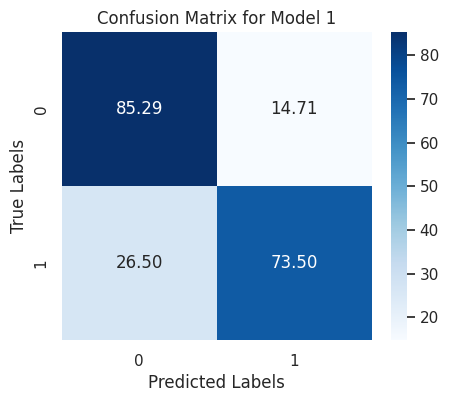

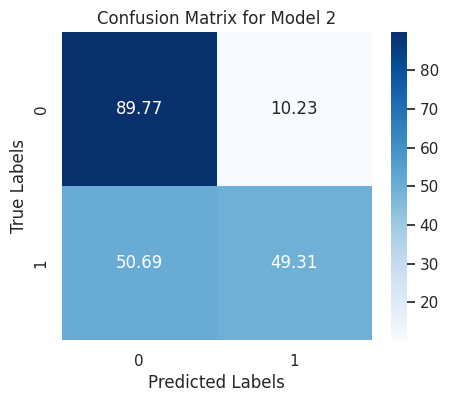

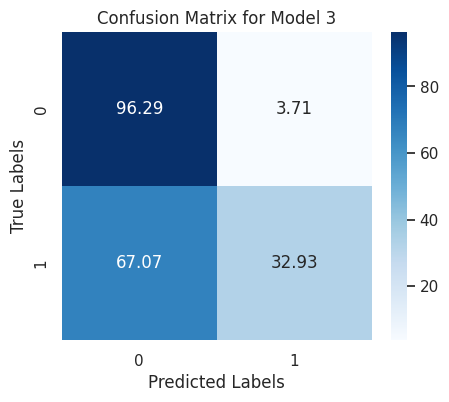

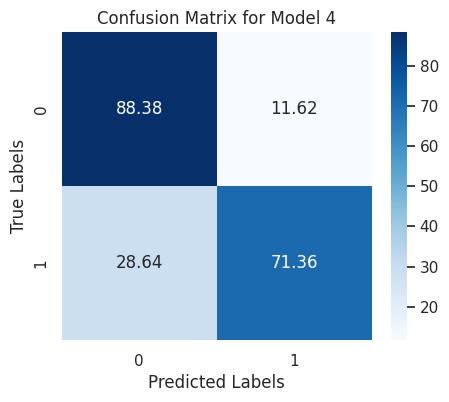

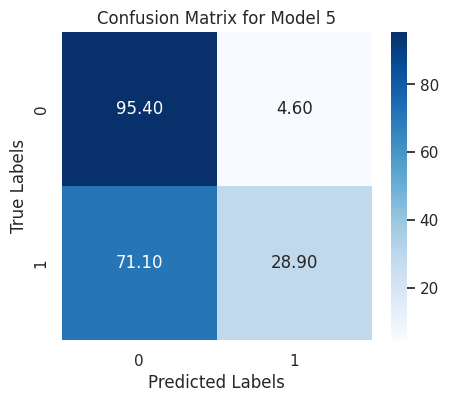

[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696


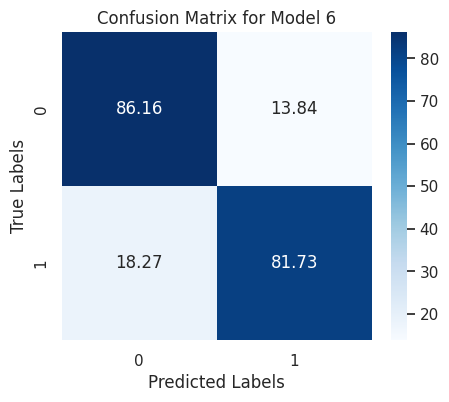

In [115]:
models = [LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0), DecisionTreeClassifier(random_state=0), 
          RandomForestClassifier(class_weight='balanced'), XGBClassifier(random_state=0, scale_pos_weight=3), KNeighborsClassifier(n_neighbors = 5), 
          LGBMClassifier(random_state=0, scale_pos_weight=3)]

for i,model in enumerate(models):
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_val_transformed)
    cm = confusion_matrix(y_val, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues")
    plt.title(f"Confusion Matrix for Model {i+1}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

## Insights
- By seeing the confusion matrix of each model, it is evident that model 1, 4 and 6 i.e. Logistic Regression, XGBClassifier and LGBMClassifier are the best models, so we can proceed further and tune them. 

# F1 Score (Macro Average) for Each Model

[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696


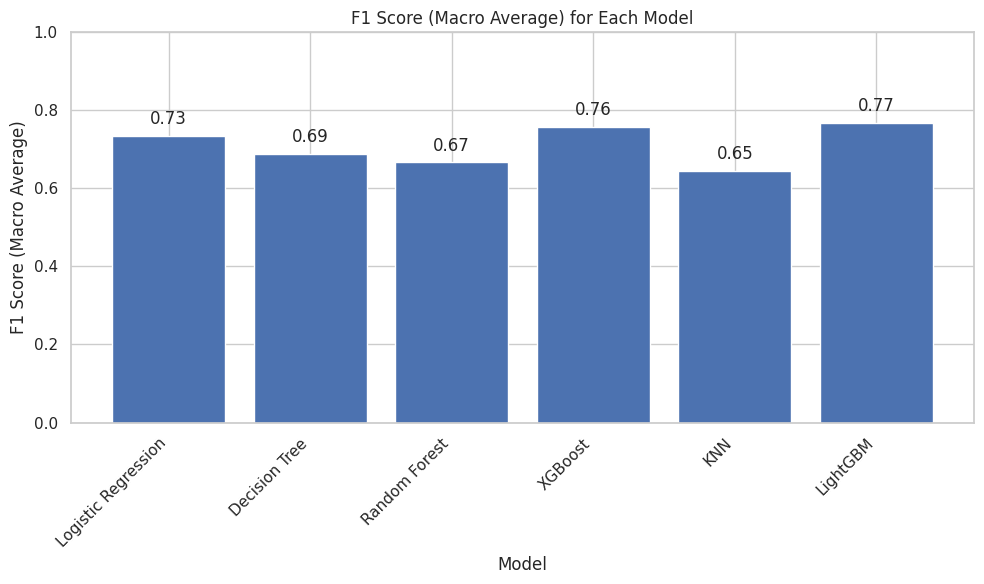

<Figure size 640x480 with 0 Axes>

In [116]:
models = [LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0), DecisionTreeClassifier(random_state=0), 
          RandomForestClassifier(class_weight='balanced'), XGBClassifier(random_state=0, scale_pos_weight=3), KNeighborsClassifier(n_neighbors = 5), 
          LGBMClassifier(random_state=0, scale_pos_weight=3)]


model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "KNN", "LightGBM"]

f1_scores = []

for i,model in enumerate(models):
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_val_transformed)
    f1 = f1_score(y_val, y_pred, average='macro')
    f1_scores.append(f1)

#Plotting Part
plt.figure(figsize=(10,6))
plt.bar(model_names, f1_scores)
plt.title("F1 Score (Macro Average) for Each Model")
plt.xlabel("Model")
plt.ylabel("F1 Score (Macro Average)")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")

for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


## Insights:
- LightGBM seems to be the most promising model for the dataset as giving the best f1 score.
- Also, XGBoost and Logistic Regression are giving a good f1 score.
- Other models doesn't seem to be of much importance to our dataset.
- Now, we will start tuning the 3 best models i.e. Logistic Regression, XGBoost and LightBGM.

# Hyper Parameter Tuning 


## Logistic Regression Tuning 

In [117]:
# param_grid = [
#     {'penalty': ['l2'], 'C': [0.01, 0.1, 1], 'solver': ['lbfgs']},
#     {'penalty': ['l1', 'l2'], 'C': [0.1, 1], 'solver': ['liblinear']},
#     {'penalty': ['l1'], 'C': [0.1], 'solver': ['saga']},
#     {'penalty': ['elasticnet'], 'C': [0.1], 'solver': ['saga'], 'l1_ratio': [0.5]}
# ]

# model = LogisticRegression(random_state=42, max_iter=2000)

# lg_gscv = GridSearchCV(estimator=model, param_grid=param_grid, 
#                        cv=3, verbose=1, n_jobs=-1)

# lg_gscv.fit(X_train_transformed, y_train)

In [118]:
# print("Best parameters found:", lg_gscv.best_params_)
# print("Best cross-validation score:", lg_gscv.best_score_)
# y_pred = lg_gscv.predict(X_val_transformed)
# print(classification_report(y_val, y_pred))

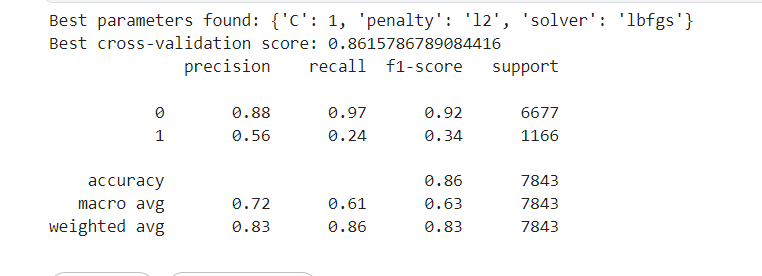

- **Our f1 macro average has reduced to 0.63**

## XGBoost Tuning

In [119]:
# xgb_model = XGBClassifier(random_state=0, scale_pos_weight=3)
# param_grid = {
#     'colsample_bytree': [0.8, 0.1],
#     'gamma': [0, 0.1],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3],
#     'n_estimators': [100, 150],
#     'subsample': [0.8, 0.9]
# }

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_macro',
#                           cv=3, n_jobs=-1, verbose=1, return_train_score=True)

# grid_search.fit(X_train_transformed, y_train)

In [120]:
# print("Best parameters found:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)
# y_pred = grid_search.predict(X_val_transformed)
# print(classification_report(y_val, y_pred))

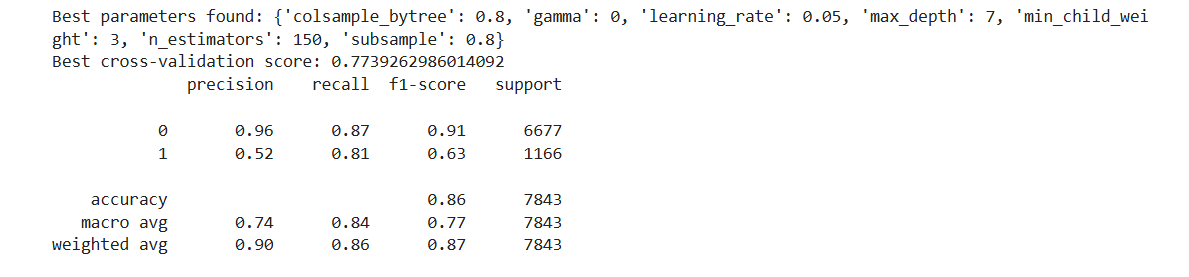

- **Our f1 macro average increased from 0.76 to 0.77**

## LightGBM Tuning 

In [121]:
# lgbm_model = LGBMClassifier(random_state=0, scale_pos_weight=3)
# param_grid = {
#     'num_leaves': [20, 31, 40],
#     'max_depth': [5, 10, 15],
#     'min_child_samples': [10, 20, 30],
#     'learning_rate': [0.1, 0.05],
#     'n_estimators': [100, 200],
#     'scale_pos_weight': [2, 3]
# }


# grid_search_2 = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, 
#                            scoring='f1_macro', cv=3, n_jobs=-1, verbose=1, 
#                            return_train_score=True)

# grid_search_2.fit(X_train_transformed, y_train)

In [122]:
# print("Best parameters found:", grid_search_2.best_params_)
# print("Best cross-validation score:", grid_search_2.best_score_)
# y_pred = grid_search_2.predict(X_val_transformed)
# print(classification_report(y_val, y_pred))

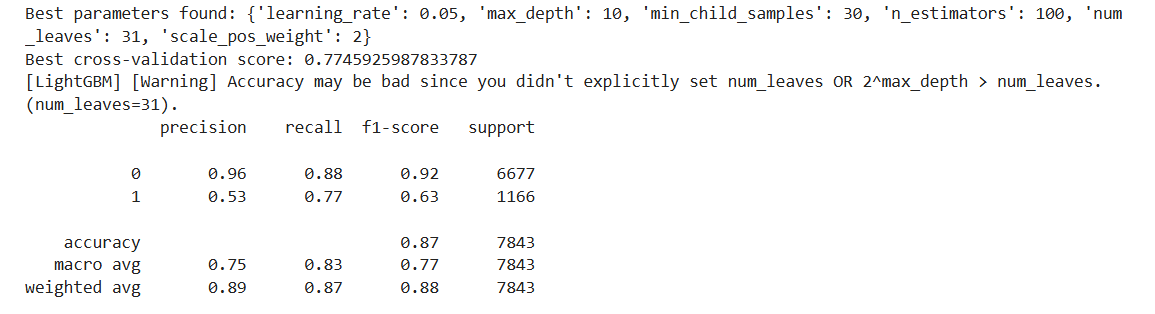

- **Our f1 macro average has remained the same i.e. 0.77**

# Stacking Classification 

In [123]:
# base_models = [
#     # ('logistic_reg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)),
#     ('xgboost', XGBClassifier(random_state = 0, colsample_bytree=0.8, gamma=0,
#                               learning_rate=0.05, max_depth=7, min_child_weight=3,
#                               n_estimators=150, scale_pos_weight=3, subsample=0.8)),
#     ('lightgbm', LGBMClassifier(random_state=0, learning_rate=0.05, 
#                                 max_depth=10, n_estimators=100, min_child_samples=30,
#                                 num_leaves=31, scale_pos_weight=2))
# ]

# meta_model = XGBClassifier(random_state = 0, colsample_bytree=0.8, gamma=0, 
#                            learning_rate=0.05, max_depth=7, min_child_weight=3,
#                            n_estimators=150, scale_pos_weight = 3, subsample=0.8)

# stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# stacked_model.fit(X_train_transformed, y_train)
# y_pred = stacked_model.predict(X_val_transformed)
# print(classification_report(y_val, y_pred))
# print(roc_auc_score(y_pred, y_val))

# Voting Classifier 

In [124]:
# # log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)
# xgb = XGBClassifier(random_state = 0, colsample_bytree=0.8, gamma=0,
#                         learning_rate=0.05, max_depth=7, min_child_weight=3,
#                         n_estimators=150, subsample=0.8, scale_pos_weight = 3)
# lgbm = LGBMClassifier(random_state=0, learning_rate=0.05, max_depth=10, min_child_samples=30,
#                       n_estimators=100, num_leaves=31, scale_pos_weight=2)

# voting_clf = VotingClassifier(
#     estimators = [('xgb', xgb), ('lgbm', lgbm)],
#     voting = 'soft'
# )

# voting_clf.fit(X_train_transformed, y_train)
# y_pred = voting_clf.predict(X_val_transformed)
# print(classification_report(y_pred, y_val))
# print(roc_auc_score(y_pred, y_val))

# Submission of Logistic Regression

In [125]:
# test_final = pd.DataFrame(Transformer.transform(test) , columns = Transformer.get_feature_names_out())

In [126]:
# test_final

In [127]:
# final_lrmodel = LogisticRegression(C = 1, penalty = 'l2', solver = 'lbfgs')
# final_lrmodel.fit(X_train_transformed, y_train)
# y_pred = final_lrmodel.predict(test_final)
# y_pred = label.inverse_transform(y_pred)

In [128]:
# y_pred

In [129]:
# prediction = pd.DataFrame({'target': y_pred}, index = range(1,len(y_pred)+1))
# prediction.index.name = 'id'
# prediction.to_csv('submission.csv')

# Submission of XGBClassifier 


In [130]:
# final_XGB_model =  XGBClassifier(random_state = 0, colsample_bytree=0.8, gamma=0,
#                                  learning_rate=0.05, max_depth=7, min_child_weight=3,
#                                  n_estimators=150, subsample=0.8, scale_pos_weight = 3)

# final_XGB_model.fit(X_train_transformed, y_train)
# y_final_pred = final_XGB_model.predict(X_final_test) 
# y_final_pred = label.inverse_transform(y_final_pred)

In [131]:
# y_final_pred

In [132]:
# sub = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv')
# sub['target'] = y_final_pred
# sub.to_csv('submission.csv', index = False)

# Submission of LGBMClassifier 

In [133]:
final_lgbm_model = LGBMClassifier(random_state=0, learning_rate=0.05, max_depth=10, 
                                  min_child_samples=30, n_estimators=100, num_leaves=31, 
                                  scale_pos_weight=2)

final_lgbm_model.fit(X_train_transformed, y_train)
y_final_pred = final_lgbm_model.predict(X_final_test)
y_final_pred = label.inverse_transform(y_final_pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [134]:
y_final_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [135]:
sub = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv')
sub['target'] = y_final_pred
sub.to_csv('submission.csv', index = False)

# Submission of Stacking Classifier

In [136]:
# base_models = [
#     ('logistic_reg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)),
#     ('xgboost', XGBClassifier(random_state = 0, colsample_bytree=0.8, gamma=0,
#                               learning_rate=0.05, max_depth=7, min_child_weight=3,
#                               n_estimators=150, subsample=0.8, scale_pos_weight = 3)),
#     ('lightgbm', LGBMClassifier(random_state=0, learning_rate=0.05, max_depth=10, min_child_samples=30,
#                                 n_estimators=100, num_leaves=31, scale_pos_weight=2))
# ]

# meta_model = LGBMClassifier(random_state=0, learning_rate=0.05, max_depth=10, min_child_samples=30,
#                             n_estimators=100, num_leaves=31, scale_pos_weight=2)
# stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# stacked_model.fit(X_train_transformed, y_train)
# y_final_pred = stacked_model.predict(X_final_test)
# y_final_pred = label.inverse_transform(y_final_pred)

In [137]:
# y_final_pred

In [138]:
# sub = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv')
# sub['target'] = y_final_pred
# sub.to_csv('submission.csv', index = False)

# Submission of Voting Classifier

In [139]:
# # log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)
# xgb = XGBClassifier(random_state = 0, colsample_bytree=0.8, gamma=0,
#                     learning_rate=0.05, max_depth=7, min_child_weight=3,
#                     n_estimators=150, subsample=0.8, scale_pos_weight = 3)
# lgbm = LGBMClassifier(random_state=0, learning_rate=0.05, max_depth=10, min_child_samples=30,
#                       n_estimators=100, num_leaves=31, scale_pos_weight=2)

# voting_clf = VotingClassifier(
#     estimators = [('xgb', xgb), ('lgbm', lgbm)],
#     voting = 'soft'
# )

# voting_clf.fit(X_train_transformed, y_train)
# y_final_pred = voting_clf.predict(X_final_test)
# y_final_pred = label.inverse_transform(y_final_pred)

In [140]:
# y_final_pred

In [141]:
# sub = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv')
# sub['target'] = y_final_pred
# sub.to_csv('submission.csv', index = False)